# Motor Estimation

In [1]:
from __future__ import print_function

In [2]:
import sys
sys.path.append('../build/')

In [3]:
%pylab inline
np.set_printoptions(precision=4, suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [4]:
import versor as vsr

In [5]:
from motor_estimation import MotorEstimationSolver
import auto_diff
import autodiff_multivector
import motor_jacobian
from dual_numbers import DualNumber

## Automatic Differentiation

Consider the function $$f:\mathbb R^2 \to \mathbb R$$

$$ f(x_1, x_2) = x_1 x_2 + \sin x_1 $$

In [6]:
f = lambda x1, x2 : x1 * x2 + sin(x1) 

In [7]:
x1 = DualNumber(1.0, 1.0)
x2 = DualNumber(2.0, 0.0)
print(x1)
print(x2)

1.0 + 1.0*epsilon
2.0 + 0.0*epsilon


In [8]:
print(f(x1,x2))

2.8414709848078967 + 2.5403023058681398*epsilon


Compute $${\partial \over \partial x_1} f(1, 2)$$

In [9]:
w1 = x1 
w2 = x2

In [10]:
w3 = w1 * w2
print(w3)

2.0 + 2.0*epsilon


In [11]:
w4 = sin(w1)
print(w4)

0.8414709848078965 + 0.54030230586813977*epsilon


In [12]:
w5 = w3 + w4
print(w5)

2.8414709848078967 + 2.5403023058681398*epsilon


$${\partial \over \partial x_1} f(1, 2)$$

In [13]:
print(w5.dual)

2.54030230587


In [14]:
x2.real + cos(x1.real)

2.5403023058681398

Compute $${\partial \over \partial x_2} f(1, 2)$$

In [15]:
x1 = DualNumber(1.0, 0.0)
x2 = DualNumber(2.0, 1.0)
w1 = x1 
w2 = x2
w3 = w1 * w2
print('w3 =', w3)
w4 = sin(w1)
print('w4 =', w4)
w5 = w3 + w4
print('w5 =', w5)

w3 = 2.0 + 1.0*epsilon
w4 = 0.8414709848078965 + 1.0*epsilon
w5 = 2.8414709848078967 + 2.0*epsilon


The gradient $$ \nabla f = \left( {\partial f \over \partial x_1}, {\partial f \over \partial x_2} \right) $$

In [16]:
grad_f = np.array([f(DualNumber(1.0,1.0), DualNumber(2.0, 0.0)).dual,
                   f(DualNumber(1.0,0.0), DualNumber(2.0, 1.0)).dual])
print(grad_f)

[ 2.5403  2.    ]


### Automatic Multivector Differentiation

Consider the vector function $f : \mathbb R_3^1 \to \mathbb R_3^1$
$$ f = a \cdot B, $$
where $a \in \mathbb R_3^1$ and $B \in \mathbb R_3^2$.

Compute the Jacobian matrix $J_f = Df $

$$ a = a_1 e_1 + a_2 e_2 + a_3 e_3 $$

In [17]:
a = vsr.Vec(1.0,0.0,0.0)
print(a)

Vec: [ 1 0 0 ]


$$ B = B_1 e_{12} + B_2 e_{13} + B_3 e_{23} $$

In [18]:
B = vsr.Biv(1.0,0.0,0.0)
print(B)

Biv: [ 1 0 0 ]


$$a_1 e_1 \cdot B_1 e_{12}$$

In [19]:
Jf, statements = autodiff_multivector.diff_adept(a,B)
print(Jf)

[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]


In [20]:
print(statements)

1: d[6] = 0
2: d[7] = 0
3: d[8] = 0
4: d[6] =  + -0*d[2] + -0*d[4] + -1*d[1] + -0*d[3]
5: d[7] =  + -0*d[2] + -0*d[5] + 1*d[0] + 1*d[3]
6: d[8] =  + 0*d[1] + 0*d[5] + 0*d[0] + 1*d[4]



In [21]:
def inner_prod_vector_bivector(a, b):
    res = [-a[2] * b[1] - a[1] * b[0],
           -a[2] * b[2] + a[0] * b[0],
            a[1] * b[2] + a[0] * b[1]]
    return res

In [22]:
def outer_prod_vector_vector(a, b):
    return [a[0] * b[1] - a[1] * b[0],
            a[0] * b[2] - a[2] * b[0],
            a[1] * b[2] - a[2] * b[1]]

In [30]:
u = vsr.Vec(0,1,0)
v = vsr.Vec(0,1,1)
v - (u * (u <= v) * 2) 

Vec: [ 0 -1 1 ]

In [31]:
u - (v * (v <= u) * 2) 

Vec: [ 0 -1 -2 ]

In [28]:
u.reflect(v)

Vec: [ 0 0 -2 ]

In [29]:
v.reflect(u)

Vec: [ 0 -1 1 ]

In [24]:
a = [DualNumber(1.0, 1.0), DualNumber(0.0, 0.0), DualNumber(0.0,0.0)]
B = [DualNumber(1.0, 0.0), DualNumber(0.0, 0.0), DualNumber(0.0,0.0)]
inner_prod_vector_bivector(a,B)

[-0.0 + -0.0*epsilon, 1.0 + 1.0*epsilon, 0.0 + 0.0*epsilon]

In [59]:
ip = lambda a,b : (a[0] * b[0] + a[1] * b[1] + a[2] * b[2])
reflect = lambda a,b : [(ai - bi) / ip(b,b) for ai, bi in 
                        zip(a, [DualNumber(2.0, 0.0) *  ip(a,b) * bi for bi in b] )]

In [46]:
type(ip(u,v))

dual_numbers.DualNumber

In [60]:
u = [DualNumber(0.0, 0.0), DualNumber(1.0, 0.0), DualNumber(0.0,0.0)]
v = [DualNumber(0.0, 0.0), DualNumber(1.0, 0.0), DualNumber(1.0,0.0)]
reflect(v,u)

[0.0 + 0.0*epsilon, -1.0 + 0.0*epsilon, 1.0 + 0.0*epsilon]

In [24]:
a = [DualNumber(1.0, 0.0), DualNumber(0.0, 1.0), DualNumber(0.0,0.0)]
B = [DualNumber(1.0, 0.0), DualNumber(0.0, 0.0), DualNumber(0.0,0.0)]
inner_prod_vector_bivector(a,B)

[-0.0 + -1.0*epsilon, 1.0 + 0.0*epsilon, 0.0 + 0.0*epsilon]

In [25]:
a = [DualNumber(1.0, 0.0), DualNumber(0.0, 0.0), DualNumber(0.0,1.0)]
B = [DualNumber(1.0, 0.0), DualNumber(0.0, 0.0), DualNumber(0.0,0.0)]
inner_prod_vector_bivector(a,B)

[-0.0 + -0.0*epsilon, 1.0 + 0.0*epsilon, 0.0 + 0.0*epsilon]

In [26]:
B = [DualNumber(1.0, 0.0), DualNumber(0.0, 0.0), DualNumber(0.0,0.0)]
Jf = np.zeros((3,3))
for i in range(3):
    a = [DualNumber(1.0, 0.0), DualNumber(0.0, 0.0), DualNumber(0.0,0.0)]
    a[i].dual = 1.0
    Jf[:,i] = [x.dual for x in inner_prod_vector_bivector(a,B)]
print(Jf)

[[-0. -1. -0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]


In [27]:
a = [DualNumber(1.0, 0.0), DualNumber(0.0, 0.0), DualNumber(0.0,0.0)]
Jf = np.zeros((3,3))
for i in range(3):
    B = [DualNumber(1.0, 0.0), DualNumber(0.0, 0.0), DualNumber(0.0,0.0)]
    B[i].dual = 1.0
    Jf[:,i] = [x.dual for x in inner_prod_vector_bivector(a,B)]
print(Jf)

[[-0. -0. -0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]


In [36]:
b = [DualNumber(1.0, 0.0), DualNumber(0.0, 0.0), DualNumber(0.0,0.0)]
Jf = np.zeros((3,3))
for i in range(3):
    a = [DualNumber(0.0, 0.0), DualNumber(1.0, 0.0), DualNumber(0.0,0.0)]
    a[i].dual = 1.0
    Jf[:,i] = [x.dual for x in outer_prod_vector_vector(a,b)]
print(Jf)

[[ 0. -1.  0.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]]


In [49]:
b = [DualNumber(1.0, 0.0), DualNumber(1.0, 0.0), DualNumber(0.0,0.0)]
Jf = np.zeros((1,3))
for i in range(3):
    a = [DualNumber(1.0, 0.0), DualNumber(1.0, 0.0), DualNumber(0.0,0.0)]
    a[i].dual = 1.0
    Jf[:,i] = [x.dual for x in [(lambda a,b : a[0] * b[0] + a[1] * b[1] + a[2] * b[2])(a,b)]]
print(Jf)

[[ 1.  1.  0.]]


In [68]:
Jf = np.zeros((3,3))
for i in range(3):
    v = [DualNumber(1.0, 0.0), DualNumber(2.0, 0.0), DualNumber(3.0,0.0)]
    u = [DualNumber(0.0, 0.0), DualNumber(1.0, 0.0), DualNumber(0.0,0.0)]
    u[i].dual = 1.0
    Jf[:,i] = [x.dual * 0.5 for x in reflect(v,u)]
print(Jf)

[[-2. -1.  0.]
 [-1. -2. -3.]
 [ 0. -3. -2.]]


In [57]:
reflect(v,u)

[0.0 + 0.0*epsilon, -1.0 + -2.0*epsilon, 1.0 + -2.0*epsilon]

In [43]:
(lambda a,b : a[0] * b[0] + a[1] * b[1] + a[2] * b[2])(a,b)

1.0 + 0.0*epsilon

In [34]:
outer_prod_vector_vector(vsr.Vec(1,2,3), vsr.Vec(2,3,1))

[-1.0, -5.0, -7.0]

In [35]:
vsr.Vec(1,2,3) ^ vsr.Vec(2,3,1)

Biv: [ -1 -5 -7 ]

In [91]:
vsr.Vec(1,2,3).duale()

Biv: [ -3 2 -1 ]

In [92]:
def euclidean_vector_dual(a):
    return [-a[2], a[1], -a[0]]

In [95]:
Jf = np.zeros((3,3))
for i in range(3):
    a = [DualNumber(1.0, 0.0), DualNumber(2.0, 0.0), DualNumber(3.0,0.0)]
    a[i].dual = 1.0
    Jf[:,i] = [x.dual for x in euclidean_vector_dual(a)]
print(Jf)

[[-0. -0. -1.]
 [ 0.  1.  0.]
 [-1. -0. -0.]]


## Motor Estimation

## Ground truth motor

In [32]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
print(motor)

Mot: [ 0.87 0 -0.5 0 -0.68 -0.43 -0.18 -0.25 ]


## Motor Estimation from Points

$$ M_\ast = \arg \min \sum_i \| \mathrm{P}_{\mathbb R_3^1}(M a \widetilde M) - \mathrm{P}_{\mathbb R_3^1}(b)  \|^2$$

### Dataset generation

In [34]:
n_points = 10
sigma = 0.09
points_a = [vsr.Vec(*np.random.normal(0.0, 0.8, 3)).null() 
            for i in range(n_points)]
points_b = [point.spin(motor) for point in points_a]
points_b_noisy = [vsr.Vec(*(np.array(point)[:3] 
                            + sigma * np.random.randn(3))).null() 
                  for point in points_b]

In [35]:
points_a

[Pnt: [ -0.4114 -1.215 0.5357 1 0.9666 ],
 Pnt: [ 0.8515 -1.093 0.6029 1 1.142 ],
 Pnt: [ -1.2 0.8402 0.06697 1 1.075 ],
 Pnt: [ 1.337 -1.016 0.7274 1 1.674 ],
 Pnt: [ -0.003747 -0.9372 -0.5821 1 0.6086 ],
 Pnt: [ 1.264 1.257 -2.253 1 4.126 ],
 Pnt: [ 0.5863 -0.6374 -0.6276 1 0.572 ],
 Pnt: [ 0.6465 -0.7569 -0.02344 1 0.4958 ],
 Pnt: [ 0.8802 -0.6276 1.086 1 1.174 ],
 Pnt: [ -0.1846 -0.4843 -2.642 1 3.623 ]]

### Estimate motor

In [66]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(points_a, points_b):
    mes.add_point_correspondences_residual_block(a,b)
# mes.set_parameterization('BIVECTOR_GENERATOR')
mes.set_parameterization('POLAR_DECOMPOSITION')

mes.linear_solver_type = 'DENSE_QR'
(estimated_motor, summary) = mes.solve()
print(summary['full_report'])


Solver Summary (v 1.11.0-eigen-(3.2.7)-lapack-suitesparse-(4.4.4)-cxsparse-(3.1.4)-no_openmp)

                                     Original                  Reduced
Parameter blocks                            1                        1
Parameters                                  8                        8
Residual blocks                            10                       10
Residual                                   30                       30

Minimizer                        TRUST_REGION

Dense linear algebra library            EIGEN
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver                        DENSE_QR                 DENSE_QR
Threads                                     1                        1
Linear solver threads                       1                        1

Cost:
Initial                          3.184348e+01
Final                            1.285458e-26
Change                   

[]

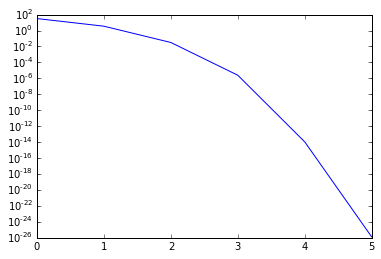

In [67]:
plt.plot([it['cost'] for it in summary['iterations'] ], label=r"$2$-residuals")
plt.semilogy()

#### Check solution

In [56]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))

[ 0.866  0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
[ 0.866 -0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
True


In [58]:
estimated_motor * estimated_motor.rev()

Mot: [ 1 0 -2.6e-20 0 -3.9e-17 5.6e-17 3.3e-17 -1.1e-16 ]

In [59]:
res = vsr.Vec(0,0,0).null().spin(estimated_motor)
print(res)

Pnt: [ 1 1 1 1 1.5 ]


<img src="http://www.people.usi.ch/kovnatsa/images/arxivmadmm2015.png" alt="Manifold Optimization" style="width:542px;height:423px;">

In [64]:
dll = vsr.Dll(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Jphi = motor_jacobian.jacobian_exp(motor, dll)
print(Jphi)

[[ 0.     0.5    0.     0.     0.     0.   ]
 [ 0.866  0.    -0.5    0.     0.     0.   ]
 [ 0.     0.866  0.     0.     0.     0.   ]
 [ 0.5    0.     0.866  0.     0.     0.   ]
 [-0.433 -0.183  0.25   0.866  0.     0.5  ]
 [ 0.683 -0.25  -0.183  0.     0.866  0.   ]
 [ 0.25   0.683  0.433 -0.5    0.     0.866]
 [-0.183  0.433 -0.683  0.     0.5    0.   ]]


In [62]:
Jf = motor_jacobian.diff_cost(motor, points_a[0], points_b[0])
print(Jf)

[[ 0.1179 -1.239   0.8825 -0.7154 -1.7321  0.      1.      0.    ]
 [-1.239  -0.1179  0.7154  0.8825  0.     -1.7321  0.     -1.    ]
 [ 0.8825 -0.7154 -0.1179  1.239  -1.      0.     -1.7321  0.    ]]


In [65]:
J = np.dot(Jf, Jphi)
print(J)

[[-0.4307  1.8232  0.     -2.      0.      0.    ]
 [-0.6608  0.      1.8232  0.     -2.      0.    ]
 [ 0.     -0.6608  0.4307  0.      0.     -2.    ]]


## Motor Estimation from Lines

### Dataset generation

In [68]:
lines_a = [vsr.Dll(vsr.Vec(*np.random.normal(0.0,0.8,3)),
                   vsr.Vec(*np.random.normal(0.0,0.8,3)))
          for i in range(10)]
lines_b = [line.spin(motor) for line in lines_a]

### Estimate motor using 6 residuals

$$ \arg \min_M \frac{1}{2} \sum_{i=1}^n \left| M \varLambda_{b_i} \tilde{M} - \varLambda_{a_i}  \right| $$

In [69]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b):
    mes.add_line_correspondences_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
estimated_motor, lin_summary_1 = mes.solve()
print(lin_summary_1['brief_report'])

Ceres Solver Report: Iterations: 5, Initial cost: 2.480264e+01, Final cost: 6.744186e-26, Termination: CONVERGENCE


#### Check solution

In [70]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))

[ 0.866  0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
[ 0.866  0.    -0.5   -0.    -0.683 -0.433 -0.183 -0.25 ]
True


### Estimate motor using 4 residuals

In [ ]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b):
    mes.add_line_angle_distance_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
estimated_motor, lin_summary_2 = mes.solve()
print(lin_summary_2['full_report'])

#### Check solution

In [ ]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))
print(np.allclose(np.array(motor), np.array(estimated_motor), 
                  rtol=1e-05, atol=1e-03))

In [ ]:
rtol = 1e-5
atol = 1e-3
[np.abs(a - b) <= atol + rtol * np.abs(b) for a, b in zip(np.array(motor), np.array(estimated_motor))]

### Estimate motor using 2 residuals

In [ ]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b):
    mes.add_line_angle_distance_norm_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
estimated_motor, lin_summary_3 = mes.solve()
print(lin_summary_3['full_report'])

#### Check solution

In [ ]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))
print(np.allclose(np.array(motor), np.array(estimated_motor), 
                  rtol=1e-05, atol=1e-03))

### Plots

In [ ]:
fig, ax = plt.subplots(1)

# ax.set_aspect('equal')
plt.set_cmap('gray')

almost_black = '#262626'
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

spines_to_keep = ['bottom', 'left']
for spine in spines_to_keep:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(almost_black)
ax.xaxis.label.set_color(almost_black)
ax.yaxis.label.set_color(almost_black)

ax.grid(True,which="both", color='0.5')
ax.set_axisbelow(True)

ax.plot([it['cost'] for it in lin_summary_3['iterations'] ], label=r"$2$-residuals")
ax.plot([it['cost'] for it in lin_summary_2['iterations'] ], label=r"$4$-residuals")
ax.plot([it['cost'] for it in lin_summary_1['iterations'] ], label=r"$6$-residuals")

ax.title.set_color(almost_black)
ax.axhline(0, color=almost_black, linewidth=0.15)
ax.axvline(0, color=almost_black, linewidth=0.15)



# Remove the line around the legend box, and instead fill it with a light grey
# Also only use one point for the scatterplot legend because the user will 
# get the idea after just one, they don't need three.
light_grey = np.array([float(248)/float(255)]*3)
legend = ax.legend(frameon=True, scatterpoints=1, bbox_to_anchor=(0.9, 0.8), bbox_transform=plt.gcf().transFigure)
# legend = ax.legend(frameon=True, scatterpoints=1)

rect = legend.get_frame()

rect.set_facecolor(light_grey)
rect.set_linewidth(0.0)

ax.set_yscale("log")

plt.xlabel(r'Iteration $k$')
plt.ylabel(r'Cost')


# plt.savefig('/Users/lars/Dropbox/Apps/ShareLaTeX/2016-gacse/figures/cost_lines.pdf')

In [ ]:
plt.figure(1)
# plt.subplot(311)
plt.plot([it['cost'] for it in lin_summary_1['iterations'] ])

# plt.subplot(312)
plt.plot([it['cost'] for it in lin_summary_2['iterations'] ])

# plt.subplot(313)
plt.plot([it['cost'] for it in lin_summary_3['iterations'] ])
plt.savefig('/Users/lars/Dropbox/Apps/ShareLaTeX/2016-gacse/figures/cost_lines.pdf')

In [ ]:
fig, ax = plt.subplots(1)
ax.plot([it['gradient_max_norm'] for it in lin_summary_1['iterations'] ])
ax.plot([it['gradient_max_norm'] for it in lin_summary_2['iterations'] ])
ax.plot([it['gradient_max_norm'] for it in lin_summary_3['iterations'] ])

## Motor Estimation from planes

### Dataset generation

In [ ]:
n_planes = 10
planes_a = []
for i in range(10):
    dir_vec = np.random.normal(0.0, 0.8, 4)
    dir_vec = dir_vec / np.linalg.norm(dir_vec)
    distance = np.random.normal(0.0, 0.8,1)
    arr = dir_vec + distance
    planes_a.append(vsr.Dlp(dir_vec[0],dir_vec[1],dir_vec[2],distance[0]))
planes_b = [plane.spin(motor) for plane in planes_a]

### Estimate motor using 2 residuals

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
noise_motor_plane = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/24)
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(planes_a, planes_b):
#     mes.add_dual_plane_angle_error_residual_block(a,b.spin(noise_motor_plane))
    mes.add_dual_plane_angle_error_residual_block(a,b)

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.function_tolerance = 1e-8
mes.max_num_iterations = 100
estimated_motor, pln_summary_1 = mes.solve()
print(pln_summary_1['brief_report'])

In [ ]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))
print(np.allclose(np.array(motor), np.array(estimated_motor), 
                  rtol=1e-05, atol=1e-03))

In [ ]:
fig, ax = plt.subplots(1)

# ax.set_aspect('equal')
plt.set_cmap('gray')

almost_black = '#262626'
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

spines_to_keep = ['bottom', 'left']
for spine in spines_to_keep:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(almost_black)
ax.xaxis.label.set_color(almost_black)
ax.yaxis.label.set_color(almost_black)

ax.plot([it['cost'] for it in pln_summary_1['iterations'] ])

ax.title.set_color(almost_black)
ax.axhline(0, color=almost_black, linewidth=0.15)
ax.axvline(0, color=almost_black, linewidth=0.15)

# Remove the line around the legend box, and instead fill it with a light grey
# Also only use one point for the scatterplot legend because the user will 
# get the idea after just one, they don't need three.

# light_grey = np.array([float(248)/float(255)]*3)
# legend = ax.legend(frameon=True, scatterpoints=1)
# rect = legend.get_frame()
# rect.set_facecolor(light_grey)
# rect.set_linewidth(0.0)

# ax.set_yscale('log')


ax.grid(True,which="both", color='0.5')
ax.set_axisbelow(True)

plt.xlabel(r'Iteration $k$')
plt.ylabel(r'Cost')

# plt.savefig('/Users/lars/Dropbox/Apps/ShareLaTeX/2016-gacse/figures/cost_planes.pdf')

## Motor Estimation from tangents

### Dataset generation

In [ ]:
n_tangents = 10
tangents_a = []
for i in range(n_tangents):
    dir_vec = np.random.normal(0.0, 0.8, 3)
    dir_vec = dir_vec / np.linalg.norm(dir_vec)
    pos = np.random.normal(0.0, 0.8, 3)
    tangents_a.append(vsr.Tnv(vsr.Vec(*dir_vec)).spin(vsr.Vec(*pos).trs() * 
                                             vsr.Rot(1,0,0,0)))

tangents_b = [tangent.spin(motor) for tangent in tangents_a]

### Estimate motors using flags

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(tangents_a, tangents_b):
    dir_vec = np.random.normal(0.0, 0.8, 3)
    dir_vec = dir_vec / np.linalg.norm(dir_vec)
    pos = np.random.normal(0.0, 0.01, 3)
    angle = np.random.normal(0.0, pi/1000., 1)
    noise_motor_tangent = vsr.Vec(*pos).trs() * vsr.Rot(vsr.Vec(*dir_vec).unduale() * angle[0])
    b = b.spin(noise_motor_tangent)
    mes.add_point_correspondences_residual_block(a.pnt(), b.pnt())
    mes.add_line_correspondences_residual_block(a.lin().dual(), b.lin().dual())
#     mes.add_tangent_vector_point_angle_error_residual_block(a,b)

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.function_tolerance = 1e-8
mes.max_num_iterations = 200
em, summary = mes.solve()
print(motor)
print(em)
print(summary['brief_report'])

### Estimate motor

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(tangents_a, tangents_b):
    mes.add_tangent_vector_point_angle_error_residual_block(a,b)

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.function_tolerance = 1e-8
mes.max_num_iterations = 2000
em, summary = mes.solve()
print(initial_motor)
print(motor)
print(em)
print(summary['full_report'])

## Motor Estimation from Circles

### Dataset generation

In [ ]:
n_circles = 5
circles_a = []
for i in range(n_circles):
    dir_vec = np.random.normal(0.0, 0.8, 3)
    dir_vec = dir_vec / np.linalg.norm(dir_vec)
    pos = np.random.normal(0.0, 0.8, 3)
    radius = np.random.normal(0.0, 0.8, 1)
    circles_a.append(vsr.Cir(vsr.Vec(*pos).null(), radius[0], 
                             vsr.Vec(*(dir_vec)).unduale()))

circles_b = [circle.spin(motor) for circle in circles_a]

### Estimate motor

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(circles_a, circles_b):
#     mes.add_point_correspondences_residual_block(a.pnt(), b.pnt())
    mes.add_dual_plane_angle_error_residual_block(a.pln().dual(), b.pln().dual())

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.function_tolerance = 1e-6
mes.max_num_iterations = 2000
em, summary = mes.solve()
print(initial_motor)
print(motor)
print(em)
print(summary['full_report'])

## Motor Estimation from Spheres

### Dataset generation

In [ ]:
n_spheres = 5
spheres_a = []
for i in range(n_spheres):
    pos = np.random.normal(0.0, 0.8, 3)
    radius = np.random.normal(0.0, 0.8, 1)
    spheres_a.append(vsr.Sph(vsr.Vec(*pos).null(), radius[0]))
spheres_b = [sphere.spin(motor) for sphere in spheres_a]

### Estimate motor

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(spheres_a, spheres_b):
    mes.add_point_correspondences_residual_block(a.pnt(),b.pnt())
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = 'DENSE_QR'
(estimated_motor, summary) = mes.solve()
print(summary['brief_report'])

## Motor Estimation from heterogeneous conformal objects

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
noise_motor = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/100)

noise_motor_plane = vsr.Vec(0.05,0.05,0.05).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/100)
noise_motor_lines = vsr.Vec(-0.01,-0.01,-0.01).trs() * vsr.Rot(vsr.Biv(0,1,0) * (-np.pi/100))
noise_motor_points = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(0,0,1) * (np.pi/100))

initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(planes_a, planes_b):
    mes.add_dual_plane_angle_error_residual_block(a,b)
for a, b in zip(lines_a, lines_b):
    mes.add_line_correspondences_residual_block(a,b)
for a, b in zip(points_a, points_b):
    mes.add_point_correspondences_residual_block(a,b)
    
    

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
# mes.function_tolerance = 1e-8
mes.max_num_iterations = 100
em, summary_het = mes.solve()
print(initial_motor)
print(motor)
print(em)
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))
print(np.allclose(np.array(motor), np.array(estimated_motor), 
                  rtol=1e-05, atol=1e-5))
print(summary_het['full_report'])

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
noise_motor = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/100)

noise_motor_planes = vsr.Vec(0.05,0.05,0.05).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/100)
noise_motor_lines = vsr.Vec(-0.01,-0.01,-0.01).trs() * vsr.Rot(vsr.Biv(0,1,0) * (-np.pi/100))
noise_motor_points = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(0,0,1) * (np.pi/100))

initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(planes_a, planes_b):
    mes.add_dual_plane_angle_error_residual_block(a,b.spin(noise_motor_plane))
for a, b in zip(lines_a, lines_b):
    mes.add_line_correspondences_residual_block(a,b.spin(noise_motor_lines))
for a, b in zip(points_a, points_b):
    mes.add_point_correspondences_residual_block(a,b.spin(noise_motor_points))
    
    

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
# mes.function_tolerance = 1e-8
mes.max_num_iterations = 100
em, summary_het_noise = mes.solve()
print(initial_motor)
print(motor)
print(em)
print(summary_het_noise['full_report'])

In [ ]:
fig, ax = plt.subplots(1)

# ax.set_aspect('equal')
plt.set_cmap('gray')

almost_black = '#262626'
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

spines_to_keep = ['bottom', 'left']
for spine in spines_to_keep:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(almost_black)
ax.xaxis.label.set_color(almost_black)
ax.yaxis.label.set_color(almost_black)

ax.plot([it['cost'] for it in summary_het['iterations'] ], label="Without noise")
ax.plot([it['cost'] for it in summary_het_noise['iterations']], label="With noise")


ax.title.set_color(almost_black)
ax.axhline(0, color=almost_black, linewidth=0.15)
ax.axvline(0, color=almost_black, linewidth=0.15)

# Remove the line around the legend box, and instead fill it with a light grey
# Also only use one point for the scatterplot legend because the user will 
# get the idea after just one, they don't need three.

light_grey = np.array([float(248)/float(255)]*3)
legend = ax.legend(frameon=True, scatterpoints=1)

rect = legend.get_frame()
rect.set_facecolor(light_grey)
rect.set_linewidth(0.0)

ax.set_yscale('log')

ax.grid(True,which="both", color='0.5')
ax.set_axisbelow(True)

plt.xlabel(r'Iteration $k$')
plt.ylabel(r'Cost')


plt.savefig('/Users/lars/Dropbox/Apps/ShareLaTeX/2016-gacse/figures/cost_heterogeneous.pdf')

## Hand Eye Calibration

### Set up motors

In [ ]:
M_object_in_world = vsr.Vec(1.0,1.0,0.1).trs() * vsr.Biv(pi/4.0, 0.0,0.0).exp()
M_eye_in_hand = vsr.Vec(0.1, 0.2, 0.3).trs() * vsr.Biv(0.0,1.0,0.0).exp()
M_eye_in_hand_initial = vsr.Vec(0.11, 0.24, 0.36).trs() * (vsr.Biv(1.0,1.0,0.0).unit() * (np.pi/5.)).exp()

### Dataset generation

In [ ]:
def hand_eye_pose_pairs(M_object_in_world, M_eye_in_hand, n):
    pose_pairs = [
            (M_hand_in_world, 
             (M_eye_in_hand.rev() * M_hand_in_world.rev() * M_object_in_world))
            for M_hand_in_world in [vsr.Vec(*np.random.rand(3)).trs() *
                                    vsr.Rot(vsr.Biv(*np.random.rand(3)).unit() *
                                            np.random.rand() * np.pi)
                                    for i in range(n)]]

    As = [pose_pair[0] for pose_pair in pose_pairs]
    Bs = [pose_pair[1] for pose_pair in pose_pairs]

    LAs = []
    LBs = []
    for i in range(n):
        for j in range(i+1,n):
            LAs.append(((As[j].rev() * As[i]).log() * 0.5).unit())
            LBs.append(((Bs[j] * Bs[i].rev()).log() * 0.5).unit())
    return LAs, LBs

In [ ]:
n_lines = 10
lines_a, lines_b = hand_eye_pose_pairs(M_object_in_world, M_eye_in_hand, n_lines)
print(len(lines_a))

### Estimate hand-eye motor 

In [ ]:
mes = MotorEstimationSolver(M_eye_in_hand_initial)
for a, b in zip(lines_a, lines_b):
    mes.add_line_angle_distance_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.function_tolerance = 1e-16
estimated_motor, summary = mes.solve()
print(summary['full_report'])

#### Check solution

In [ ]:
print(np.array(M_eye_in_hand))
print(np.array(estimated_motor))
print(np.allclose(np.array(M_eye_in_hand), np.array(estimated_motor)))

### Real Experiment

In [ ]:
import cPickle as pickle
import math3d as m3d

#### Dataset generation

In [ ]:
rob_pose_list = pickle.load(open('pose_list.dump'))
obj_pose_list = pickle.load(open('obj_pose_list.dump'))
a_trfs = pickle.load(open('as.dump'))
b_trfs = pickle.load(open('bs.dump'))

In [ ]:
rob_motors = [vsr.Vec(*pos).trs() * vsr.Rot(vsr.Vec(*axis).unduale() * angle / 2.)
              for pos, (axis, angle) in [(m3d.Transform(pose).pos, 
                                          m3d.Transform(pose).orient.axis_angle)
                                         for pose in rob_pose_list]]
obj_motors = [vsr.Vec(*pos).trs() * vsr.Rot(vsr.Vec(*axis).unduale() * angle / 2.)
              for pos, (axis, angle) in [(m3d.Transform(pose).pos, 
                                          m3d.Transform(pose).orient.axis_angle)
                                         for pose in obj_pose_list]]

In [ ]:
n_lines = len(rob_motors)
lines_a = []
lines_b = []
for i in range(n_lines):
    for j in range(i+1,n_lines):
        lines_a.append(((rob_motors[j].rev() * rob_motors[i]).log() * 0.5).unit())
        lines_b.append(((obj_motors[j].rev() * obj_motors[i]).log() * 0.5).unit())

In [ ]:
n_lines = len(a_trfs)
motors_a = [vsr.Vec(*pos).trs() * vsr.Rot(vsr.Vec(*axis).unduale() * angle / 2.)
              for pos, (axis, angle) in [(m3d.Transform(pose).pos, 
                                          m3d.Transform(pose).orient.axis_angle)
                                         for pose in a_trfs]]
motors_b = [vsr.Vec(*pos).trs() * vsr.Rot(vsr.Vec(*axis).unduale() * angle / 2.)
              for pos, (axis, angle) in [(m3d.Transform(pose).pos, 
                                          m3d.Transform(pose).orient.axis_angle)
                                         for pose in b_trfs]]
lines_a = [motor.log() for motor in motors_a]
lines_b = [motor.log() for motor in motors_b]

#### Estimate hand-eye motor

In [74]:
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b):
    mes.add_line_correspondences_residual_block(b,a)
#     mes.add_line_angle_distance_residual_block(b,a)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.max_num_iterations = 25
mes.function_tolerance = 1e-12
estimated_motor, summary = mes.solve()
print(summary['full_report'])


Solver Summary (v 1.11.0-eigen-(3.2.7)-lapack-suitesparse-(4.4.4)-cxsparse-(3.1.4)-no_openmp)

                                     Original                  Reduced
Parameter blocks                            1                        1
Parameters                                  8                        8
Effective parameters                        6                        6
Residual blocks                            10                       10
Residual                                   60                       60

Minimizer                        TRUST_REGION

Dense linear algebra library            EIGEN
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver                        DENSE_QR                 DENSE_QR
Threads                                     1                        1
Linear solver threads                       1                        1

Cost:
Initial                          2.480264e+01


In [ ]:
print(estimated_motor)
print(m3d.Transform(estimated_motor.matrix()))

#### Combination of estimates

In [ ]:
bivectors = [np.array((r * estimated_motor * o.rev()).log()) 
             for r, o in zip(rob_motors, obj_motors)]
m = vsr.Dll(*np.average(bivectors,0)).exp()
print(m3d.Transform(m.matrix()))

#### Tsai Lenz Solver

In [ ]:
from tsai_lens_calibration import TsaiLenzCalibrator

In [ ]:
pose_pairs = [(m3d.Transform(A), m3d.Transform(B)) 
              for (A, B)  in zip(rob_pose_list, obj_pose_list)]
tsai_lens = TsaiLenzCalibrator(pose_pairs)
tsai_lens.sensor_in_flange

#### Park Martin Solver

In [69]:
from park_martin import calibrate as park_martin_calibration
A, B = [], []
n_trfs = len(rob_pose_list)
for i in range(n_trfs):
    for j in range(i+1, n_trfs):
        A.append((m3d.Transform(rob_pose_list[j]).inverse * m3d.Transform(rob_pose_list[i])).array)
        B.append((m3d.Transform(obj_pose_list[j]).inverse * m3d.Transform(obj_pose_list[i])).array)
R,t = park_martin_calibration(A,B)
print(m3d.Transform(R,t))

NameError: name 'rob_pose_list' is not defined

In [71]:
def daniilidis(LAs, LBs):
    def skew(v):
        skv = roll(roll(diag(v.flatten()), 1, 1), -1, 0)
        return skv - skv.T
    
    Ds = []
    for LA, LB in zip(LAs, LBs):
        LA = LA.unit()
        LB = LB.unit()
        D = np.zeros((6,8))
        a = np.array(LA).copy()[:3]
        a = np.array([a[2], -a[1], a[0]])
        b = np.array(LB).copy()[:3]
        b = np.array([b[2], -b[1], b[0]])
        aprime = np.array(LA).copy()[3:]
        bprime = np.array(LB).copy()[3:]
        # Upper 3
        D[:3,0] = a - b
        D[:3,1:4] = skew(a + b)
        # Lower 3
        D[3:,0] = aprime - bprime
        D[3:,1:4] = skew(aprime + bprime)
        D[3:,4] = a - b 
        D[3:,5:8] = skew(a + b)  
        Ds.append(D)
    Ds = np.array(Ds).reshape(-1,8)
    
    [U, s, Vt] = np.linalg.svd(Ds)
    v7 = Vt.T[:,-2]
    v8 = Vt.T[:,-1]
    u1 = v7[:4]
    v1 = v7[4:]
    u2 = v8[:4]
    v2 = v8[4:]
    
    a = np.inner(u1,v1)
    b = np.inner(u1,v2) + np.inner(u2,v1)
    c = np.inner(u2,v2)
    [s1, s2] = np.roots([a,b,c])
    
    val1 = (s1**2 * np.inner(u1,u1)) + (2 * s1 * np.inner(u1,u2)) + (np.inner(u2,u2))
    val2 = (s2**2 * np.inner(u1,u1)) + (2 * s2 * np.inner(u1,u2)) + (np.inner(u2,u2))

    if val1 > val2:
        s = s1
        val = val1
    else:
        s = s2
        val = val2

    lambda2 = np.sqrt(1./val)
    lambda1 = s * lambda2
    
    m_arr = lambda1 * v7 + lambda2 * v8
    m_arr[1:4] = np.array([m_arr[3], -m_arr[2], m_arr[1]])
    m_arr[4:8] = np.roll(m_arr[4:8], -1)
    
    print(Ds)
    
    return vsr.Mot(*m_arr)

In [72]:
daniilidis_motor = daniilidis(lines_b, lines_a)

[[ 0.7802  0.      1.3513 -0.655   0.      0.      0.      0.    ]
 [ 0.     -1.3513  0.      0.9231  0.      0.      0.      0.    ]
 [-0.533   0.655  -0.9231  0.      0.      0.      0.      0.    ]
 [-0.5209  0.      0.4184  2.2481  0.7802  0.      1.3513 -0.655 ]
 [ 0.8707 -0.4184  0.      1.11    0.     -1.3513  0.      0.9231]
 [-0.542  -2.2481 -1.11    0.     -0.533   0.655  -0.9231  0.    ]
 [-0.9273  0.     -1.6061 -0.5637  0.      0.      0.      0.    ]
 [ 0.      1.6061  0.     -0.4269  0.      0.      0.      0.    ]
 [ 0.2465  0.5637  0.4269  0.      0.      0.      0.      0.    ]
 [ 1.8814  0.      1.1978 -4.7817 -0.9273  0.     -1.6061 -0.5637]
 [-1.1764 -1.1978  0.     -2.0248  0.      1.6061  0.     -0.4269]
 [ 0.4399  4.7817  2.0248  0.      0.2465  0.5637  0.4269  0.    ]
 [ 0.1253  0.      0.2171 -1.4108  0.      0.      0.      0.    ]
 [-0.     -0.2171  0.      1.2084  0.      0.      0.      0.    ]
 [-0.6977  1.4108 -1.2084  0.      0.      0.      0.      0. 

In [ ]:
print(m3d.Transform(daniilidis_motor.matrix()))

In [73]:
print(estimated_motor * estimated_motor.rev())
print(daniilidis_motor * daniilidis_motor.rev())

Mot: [ 1 0 -4.5e-28 0 4.4e-17 5.6e-17 2.5e-18 0 ]
Mot: [ 1 0 -2.3e-33 0 6.2e-17 1.4e-17 -7e-18 0.87 ]


In [ ]:
bivectors = [np.array((r * daniilidis_motor * o.rev()).log()) 
             for r, o in zip(rob_motors, obj_motors)]
m = vsr.Dll(*np.average(bivectors,0)).exp()
print(m3d.Transform(m.matrix()))